# Predicting Manhattan Apartment Rental Prices using StreetEasy data

In [34]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

For this project, we will specially be looking for rental apartments from Manhattan. StreetEasy does provide rental information from other boroughs, which can be accessed by simply editing the url below.

In [4]:
streeteasy = pd.read_csv("https://raw.githubusercontent.com/sonnynomnom/Codecademy-Machine-Learning-Fundamentals/master/StreetEasy/manhattan.csv")


In [5]:
df = pd.DataFrame(streeteasy)

In [15]:
print("Number of rows: ",len(df))
print(df.head())

Number of rows:  3539
   rental_id   rent  bedrooms  bathrooms  size_sqft  min_to_subway  floor  \
0       1545   2550       0.0          1        480              9    2.0   
1       2472  11500       2.0          2       2000              4    1.0   
2       2919   4500       1.0          1        916              2   51.0   
3       2790   4795       1.0          1        975              3    8.0   
4       3946  17500       2.0          2       4800              3    4.0   

   building_age_yrs  no_fee  has_roofdeck  has_washer_dryer  has_doorman  \
0                17       1             1                 0            0   
1                96       0             0                 0            0   
2                29       0             1                 0            1   
3                31       0             0                 0            1   
4               136       0             0                 0            1   

   has_elevator  has_dishwasher  has_patio  has_gym       

We see from the data that there are 3539 apartments in our dataset and 18 columns. Our dependent variable for our regression, which we are trying to predict is the apartment "rent" which denotes the price of rent in USD for that apartment.

The independent variables which we will analyze include:

* rental_id - rental ID
* building_id - building ID
* bedrooms - number of bedrooms
* bathrooms - number of bathrooms
* size_sqft - size (ft²)
* min_to_subway - subway station (min)
* floor - floor number
* building_age_yrs - building age (year)
* no_fee - has no broker fee (0/1)
* has_roofdeck - has roof deck (0/1)
* has_washer_dryer - has in-unit washer/dryer (0/1)
* has_doorman - has doorman (0/1)
* has_elevator - has elevator (0/1)
* has_dishwasher - has dishwasher (0/1)
* has_patio - has patio (0/1)
* has_gym - has gym (0/1)
* neighborhood - neighborhood (ex: Greenpoint)
* submarket - submarket (ex: North Brooklyn)
* borough - borough (ex: Brooklyn)


We look at the relationship between each of the dependent variables and the rent price of each apartment. For example, I've shown the relationship between apartment size with rent price below.

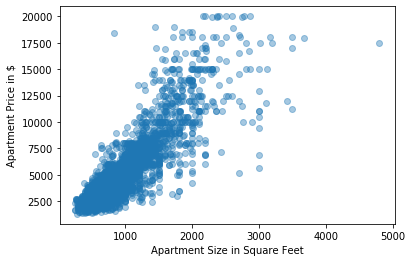

In [37]:
plt.scatter(df[['size_sqft']], df[['rent']], alpha=0.4)
plt.xlabel("Apartment Size in Square Feet")
plt.ylabel("Apartment Price in $")
plt.show()

We see a clear positive relationship between the two variables indicating that they are positively correlated.

### Building our Multi-variable Regression Model

To start off with, we will include every relevant variable in our regression to identify the significant ones. We will use a linear regression with the dependent variable being the rent price of the apartment.

In future updates of this project, we will implement model selection to select only the most important variables using AIC or BIC selection in order to follow Occam's Razor.

In [44]:
dep_vars = ['bedrooms', 'bathrooms', 'size_sqft', 'min_to_subway', 'floor', 
        'building_age_yrs', 'no_fee', 'has_roofdeck', 'has_washer_dryer', 
        'has_doorman', 'has_elevator', 'has_dishwasher', 'has_patio', 'has_gym']

x = df[dep_vars]
y = df[['rent']]


We use the train_test_split function to split the data into training and testing datasets. We have chosen 80% of the dataset to be for training.

In [45]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.8, test_size = 0.2, random_state=6)

In [62]:
lm = LinearRegression()

model=lm.fit(x_train, y_train)

coeffs = model.coef_
model.

for i in range(len(dep_vars)):
    print(dep_vars[i]," : ",round(coeffs[0][i],3))

bedrooms  :  -302.73
bathrooms  :  1199.386
size_sqft  :  4.8
min_to_subway  :  -24.29
floor  :  24.198
building_age_yrs  :  -7.583
no_fee  :  -140.907
has_roofdeck  :  48.85
has_washer_dryer  :  191.426
has_doorman  :  -151.115
has_elevator  :  89.409
has_dishwasher  :  -57.897
has_patio  :  -19.319
has_gym  :  -38.924


We have now created our multi-variable regression model and can see the coefficients for each variable. The number of bathrooms has the biggest effect on the price of each apartment as for every additional bathroom, there is an increase in rent price by $1199.386. 

Surprisingly, increases in the number of bedrooms, and the presence of having a doorman, dishwasher, patio and gym all reduce the rent price. This is largely due to not having accounted for multi-collinearity as each variable's impact ends up most likely being included in the impact of bathrooms.

At this time, I will not be adjusting for multi-collinearity since that falls out of the purpose of this small project which was just to explore the scikit-learn multiple regression package. In a future update, I will look into this issue and adjust for it.

### Using our Model to Predict Apartment Rent Prices in Manhattan

In [8]:
y_predict = lm.predict(x_test)

We will graph out our prediction vs the actual price next.

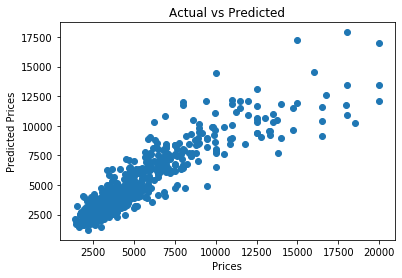

In [43]:
plt.scatter(y_test,y_predict)
plt.xlabel("Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted")
plt.show()

Ideally for the Actual vs Predicted graph, we would want a perfectly straight line. We do see a fairly linear trend which indicates that our model is fairly accurate. However, we do notice that the model is better at predicting apartments which have a lower price, and not great for higher priced apartments. This is largely due to the lack of high-end apartments within our dataset.

In a future update, we can try increasing the number of high-end apartments in our training dataset so that the model can do better at predicting the rent prices for these apartments. Also, as the spread increases at higher values, we can and should consider a **logistic regression model** for this data.

In [66]:
print("R^2 for training dataset: ",model.score(x_train,y_train))
print("R^2 for testing dataset: ",model.score(x_test,y_test))

R^2 for training dataset:  0.7725460559817883
R^2 for testing dataset:  0.8050371975357681


The sci-kit learn package also does include the R^2 values for our model. We see that our model does well for both the training and test datasets, which shows that it is consistent. The R^2 is very high for our data indicating that the model is a good fit for predicting rent prices in Manhattan.